In [58]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/home/dell/Scrivania/porepy/src/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


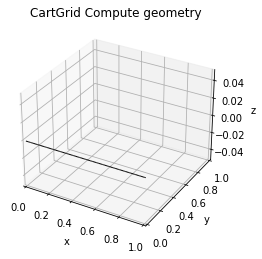

In [59]:
dim=1
Nx=Ny=100
phys_dims=[1]
g=pp.CartGrid([Nx],phys_dims)
g.compute_geometry()
#pp.plot_grid(g,figsize=(15,12))
pp.plot_grid(g)

In [60]:
# Permeability
perm = pp.SecondOrderTensor(1e-7*np.ones(g.num_cells))                     

# Unitary scalar source already integrated in each cell
#f = g.cell_volumes
source= lambda x: math.sin(4*math.pi*x)
h=1/Nx
#source=lambda x:1.0e-1
x=np.linspace(h/2,1-h/2,Nx)
f=np.zeros(Nx)
for i in range(Nx):
    f[i]=h*source(x[i])

# Boundary conditions
b_faces = g.tags['domain_boundary_faces'].nonzero()[0]
bc = pp.BoundaryCondition(g, b_faces, ['dir']*b_faces.size)
bc_val = np.zeros(g.num_faces)
bc_val[0]=1e6
bc_val[bc_val.size-1]=-800000.0

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "source": f, "bc": bc, "bc_values": bc_val}
#parameters


In [61]:
data_key = "flow"
data = pp.initialize_default_data(g, {}, data_key, parameters)

In [62]:
#flow_discretization = pp.Tpfa(data_key)
#flow_discretization.discretize(g, data)
#A, b_flow = flow_discretization.assemble_matrix_rhs(g, data)
#rhs_discretization = pp.ScalarSource(data_key)
#rhs_discretization.discretize(g, data)
#_, b_rhs = rhs_discretization.assemble_matrix_rhs(g, data)
#p_tpfa = sps.linalg.spsolve(A, b_flow+b_rhs) 
#print(A)

In [63]:
#flow_discretization = pp.MVEM("flow")
#flow_discretization.discretize(g, data)
#A, b_flow = flow_discretization.assemble_matrix_rhs(g, data)

#rhs_discretization = pp.DualScalarSource("flow")

#data[pp.PARAMETERS]["flow"]["source"] = data[pp.PARAMETERS]["flow"]["source"]
#rhs_discretization.discretize(g, data)
#, b_rhs = rhs_discretization.assemble_matrix_rhs(g, data)

#p = sps.linalg.spsolve(A, b_flow+b_rhs)                                              

##Extract the normal flux and pressure from the solution
#_mvem = flow_discretization.extract_flux(g, up, data)
#_mvem = flow_discretization.extract_pressure(g, up, data) 

##For visualisation purpose project the flux on a vector piecewise constant field
#0u = flow_discretization.project_flux(g, u_mvem, data)

In [64]:
flow_discretization = pp.RT0(data_key)
flow_discretization.discretize(g, data)
A, b_flow = flow_discretization.assemble_matrix_rhs(g, data)
rhs_discretization = pp.ScalarSource(data_key)
rhs_discretization.discretize(g, data)
_, b_rhs = rhs_discretization.assemble_matrix_rhs(g, data)
rhs=b_flow
rhs[Nx+1:2*Nx+1]-=b_rhs #metto meno perché la matrice B è definita diversa da come è nel mio codice

In [65]:
sol=sps.linalg.spsolve(A,rhs)
x=np.linspace(1/(2*Nx),1-1/(2*Nx),Nx)
x_vel=np.linspace(0,1,Nx+1)
vel=sol[0:Nx+1]
pres=sol[Nx+1:2*Nx+1]

[ 994971.02769089  984850.4575938   974542.99870134  963927.33504494
  952887.01122927  941312.26900339  929101.77821395  916164.23484221
  902419.80092297  887801.36363699  872255.59372022  855743.78649817
  838242.47228173  819743.78649817  800255.59372022  779801.36363699
  758419.80092296  736164.2348422   713101.77821394  689312.26900339
  664887.01122926  639927.33504493  614542.99870133  588850.45759379
  562971.02769087  537028.9723091   511149.54240618  485457.00129864
  460072.66495504  435112.98877071  410687.73099659  386898.22178603
  363835.76515777  341580.19907701  320198.63636299  299744.40627975
  280256.2135018   261757.52771825  244256.2135018   227744.40627975
  212198.63636299  197580.19907701  183835.76515778  170898.22178603
  158687.73099659  147112.98877072  136072.66495505  125457.00129865
  115149.54240619  105028.97230911   94971.02769088   84850.4575938
   74542.99870134   63927.33504494   52887.01122927   41312.2690034
   29101.77821395   16164.23484221  

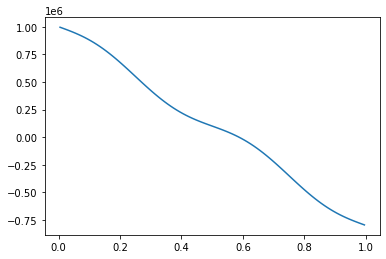

In [66]:
#fig, axs = plt.subplots(1,2,figsize=(15,15))
#fig.suptitle('Pressure and Velocity')
#axs[0].plot(x, pres)
#axs[1].plot(x_vel,vel)
plt.plot(x,pres)
print(pres)

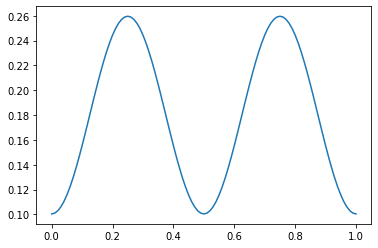

In [67]:
plt.plot(x_vel,vel)